### Import and warehouse data:

#### Import all the given datasets and explore shape and size of each.  

In [1]:
#linear algebra
import numpy as np
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [2]:
# matplotlib.pyplot plots data
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [3]:
churn1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
churn1.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  
0  No phone service             DSL             No  
1                No             DSL            Yes  
2                No             DSL            Yes  
3  No phone service             DSL            Yes  
4                No     Fiber optic             No

In [4]:
churn2 = pd.read_csv('TelcomCustomer-Churn_2.csv')
churn2.head()

OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0          Yes               No          No          No              No   
1           No              Yes          No          No              No   
2          Yes               No          No          No              No   
3           No              Yes         Yes          No              No   
4           No               No          No          No              No   

         Contract PaperlessBilling              PaymentMethod  MonthlyCharges  \
0  Month-to-month              Yes           Electronic check           29.85   
1        One year               No               Mailed check           56.95   
2  Month-to-month              Yes               Mailed check           53.85   
3        One year               No  Bank transfer (automatic)           42.30   
4  Month-to-month              Yes           Electronic check           70.70   

  TotalCharges Churn  
0        29.85    No  
1       1889.5    No  
2       108.15   Yes  
3      1840.75    No  
4       151.65   Yes

In [5]:
churn1.shape

(7043, 10)

In [6]:
churn2.shape

(7043, 11)

Merge all datasets onto one and explore final shape and size.

In [7]:
data = pd.concat([churn1, churn2], axis = 1)
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [8]:
data.shape

(7043, 21)

In [9]:
data.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

### Data cleansing:

#### Explore and if required correct the datatypes of each attribute

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [13]:
#data2 = data.drop("TotalCharges")
data2 = data.drop("TotalCharges", axis=1)
data2.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges Churn  
0              Yes           Electronic check           29.85    No  
1               No               Mailed check           56.95    No  
2              Yes               Mailed check           53.85   Yes  
3               No  Bank transfer (automatic)           42.30    No  
4              Yes           Electronic check           70.70   Yes

In [14]:
for feature in data2.columns: # Loop through all columns in the dataframe
    if data2[feature].dtype == 'object': # Only apply for columns with categorical strings
        data2[feature] = pd.Categorical(data2[feature])# Replace strings with an integer
data2.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   
5               Yes     Fiber optic             No           No   
6               Yes     Fiber optic             No          Yes   
7  No phone service             DSL            Yes           No   
8               Yes     Fiber optic             No           No   
9                No             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   
5              Yes          No         Yes             Yes  Month-to-month   
6               No          No         Yes              No  Month-to-month   
7               No          No          No              No  Month-to-month   
8              Yes         Yes         Yes             Yes  Month-to-month   
9               No          No          No              No        One year   

  PaperlessBilling              PaymentMethod  MonthlyCharges Churn  
0              Yes           Electronic check           29.85    No  
1               No               Mailed check           56.95    No  
2              Yes               Mailed check           53.85   Yes  
3               No  Bank transfer (automatic)           42.30    No  
4              Yes           Electronic check           70.70   Yes  
5              Yes           Electronic check           99.65   Yes  
6              Yes    Credit card (automatic)           89.10    No  
7               No               Mailed check           29.75    No  
8              Yes           Electronic check          104.80   Yes  
9               No  Bank transfer (automatic)           56.15    No

In [15]:
data2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')

Convert categorical attributes to continuous using relevant functional knowledge

In [16]:
data = pd.concat([data2, data['TotalCharges']], axis = 1)
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  Churn TotalCharges  
0           Electronic check          29.85     No        29.85  
1               Mailed check          56.95     No       1889.5  
2               Mailed check          53.85    Yes       108.15  
3  Bank transfer (automatic)          42.30     No      1840.75  
4           Electronic check          70.70    Yes       151.65  

[5 rows x 21 columns]

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [18]:
for col in data:
    print(data[col].value_counts())

0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes

In [19]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
Churn                  2
TotalCharges        6531
dtype: int64

In [20]:
replaceStruct = {
                "gender":     {"Male": 1, "Female": 2},
                "Partner": {"Yes": 1, "No":0},
                "SeniorCitizen": {"Yes": 1, "No":0},
                "Dependents": {"Yes": 1, "No":0},
                "PhoneService": {"Yes": 1, "No":0},
                "MultipleLines": {"Yes": 2, "No":1, "No phone service":0},
                "OnlineSecurity": {"Yes": 2, "No":1, "No internet service":0},
                "OnlineBackup": {"Yes": 2, "No":1, "No internet service":0},
                "DeviceProtection": {"Yes": 2, "No":1, "No internet service":0},
                "TechSupport": {"Yes": 2, "No":1, "No internet service":0},
                "StreamingTV": {"Yes": 2, "No":1, "No internet service":0},
                "StreamingMovies": {"Yes": 2, "No":1, "No internet service":0},
                "PaperlessBilling": {"Yes": 1, "No":0},
                "Churn":{"No": 0, "Yes": 1 } 
                    }
oneHotCols=["InternetService","Contract","PaymentMethod"]

In [21]:
data1=data.replace(replaceStruct)
data1=pd.get_dummies(data1, columns=oneHotCols)
data1.head(10)

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       2              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       2              0        0           0       2   
5  9305-CDSKC       2              0        0           0       8   
6  1452-KIOVK       1              0        0           1      22   
7  6713-OKOMC       2              0        0           0      10   
8  7892-POOKP       2              0        1           0      28   
9  6388-TABGU       1              0        0           1      62   

   PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  ...  \
0             0              0               1             2  ...   
1             1              1               2             1  ...   
2             1              1               2             2  ...   
3             0              0               2             1  ...   
4             1              1               1             1  ...   
5             1              2               1             1  ...   
6             1              2               1             2  ...   
7             0              0               2             1  ...   
8             1              2               1             1  ...   
9             1              1               2             2  ...   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    1                            0                   0   
1                    1                            0                   0   
2                    1                            0                   0   
3                    1                            0                   0   
4                    0                            1                   0   
5                    0                            1                   0   
6                    0                            1                   0   
7                    1                            0                   0   
8                    0                            1                   0   
9                    1                            0                   0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1                        0                  1                  0   
2                        1                  0                  0   
3                        0                  1                  0   
4                        1                  0                  0   
5                        1                  0                  0   
6                        1                  0                  0   
7                        1                  0                  0   
8                        1                  0                  0   
9                        0                  1                  0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   
5                                        0   
6                                        0   
7                                        0   
8                                        0   
9                                        1   

  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                     0                               1   
1                                     0                               0   
2                                     0                               0   
3                                     0                               0   
4                         

In [22]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   customerID                               7043 non-null   category
 1   gender                                   7043 non-null   int64   
 2   SeniorCitizen                            7043 non-null   int64   
 3   Partner                                  7043 non-null   int64   
 4   Dependents                               7043 non-null   int64   
 5   tenure                                   7043 non-null   int64   
 6   PhoneService                             7043 non-null   int64   
 7   MultipleLines                            7043 non-null   int64   
 8   OnlineSecurity                           7043 non-null   int64   
 9   OnlineBackup                             7043 non-null   int64   
 10  DeviceProtection                    

In [23]:
data1['TotalCharges'] = pd.to_numeric(data1['TotalCharges'],errors = 'coerce')

In [24]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   customerID                               7043 non-null   category
 1   gender                                   7043 non-null   int64   
 2   SeniorCitizen                            7043 non-null   int64   
 3   Partner                                  7043 non-null   int64   
 4   Dependents                               7043 non-null   int64   
 5   tenure                                   7043 non-null   int64   
 6   PhoneService                             7043 non-null   int64   
 7   MultipleLines                            7043 non-null   int64   
 8   OnlineSecurity                           7043 non-null   int64   
 9   OnlineBackup                             7043 non-null   int64   
 10  DeviceProtection                    

In [25]:
data1.isna().sum()

customerID                                  0
gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PhoneService                                0
MultipleLines                               0
OnlineSecurity                              0
OnlineBackup                                0
DeviceProtection                            0
TechSupport                                 0
StreamingTV                                 0
StreamingMovies                             0
PaperlessBilling                            0
MonthlyCharges                              0
Churn                                       0
TotalCharges                               11
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
Contract_Month-to-month           

In [26]:
data1 = data1.dropna()

In [27]:
data1.isna().sum()

customerID                                 0
gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
Churn                                      0
TotalCharges                               0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_O

### Data analysis & visualisation: 

#### Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.  

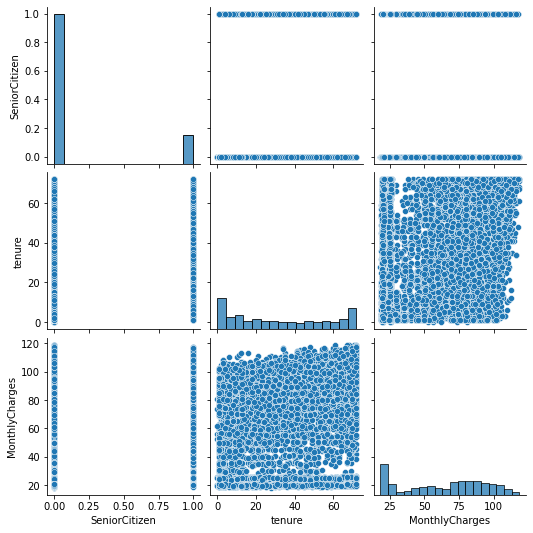

In [28]:
sns.pairplot(data);

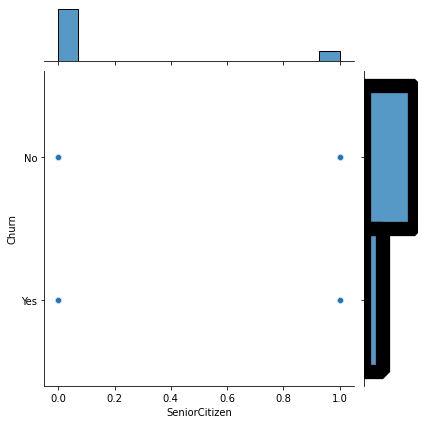

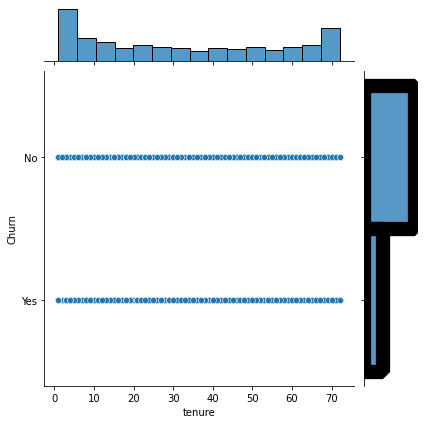

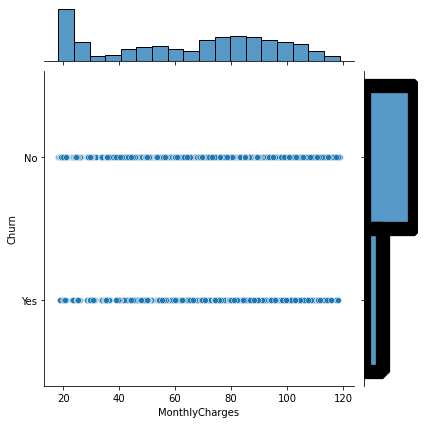

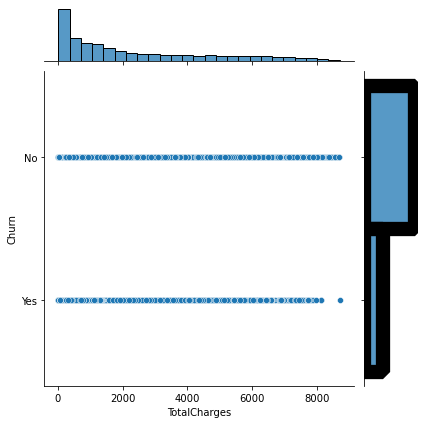

In [29]:
datax = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges'] 
for i in datax:
    sns.jointplot(data1[i],data['Churn']);

#### Insights
Based on the above graph looks like the Senior Citizens are not churning often

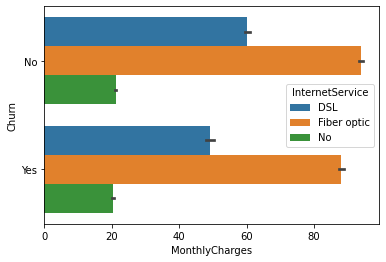

In [30]:
sns.barplot(data['MonthlyCharges'], data['Churn'], hue=data['InternetService']);

#### Insights
The Monthly Charges & Internet Service are not helpful so much for the visual analysis of the Churning

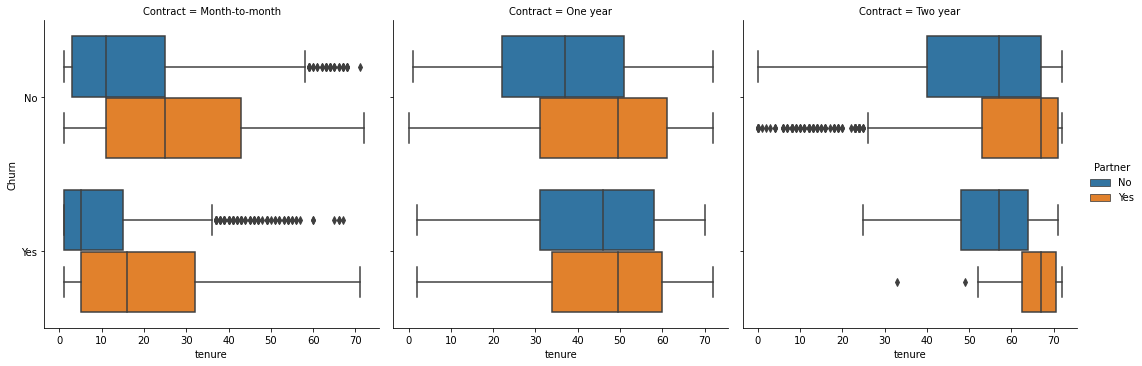

In [31]:
sns.catplot(x="tenure",
               y = "Churn",
               hue="Partner", 
               col="Contract", 
               data=data, 
               kind="box");

Visual interpretation based on the type of Contract

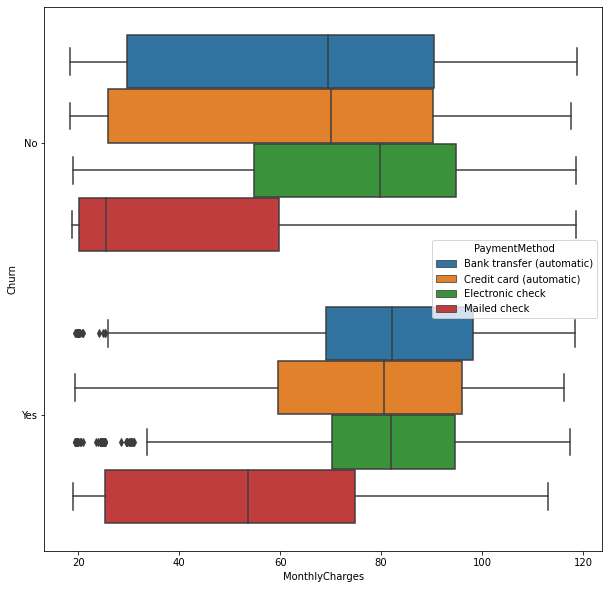

In [32]:
plt.figure(figsize=(10, 10))
sns.boxplot(data['MonthlyCharges'], data['Churn'], hue=data['PaymentMethod']);
plt.show()

In [33]:
data1.shape

(7032, 28)

#### Correlation of the various features to identify the realtion with Churning of the customer

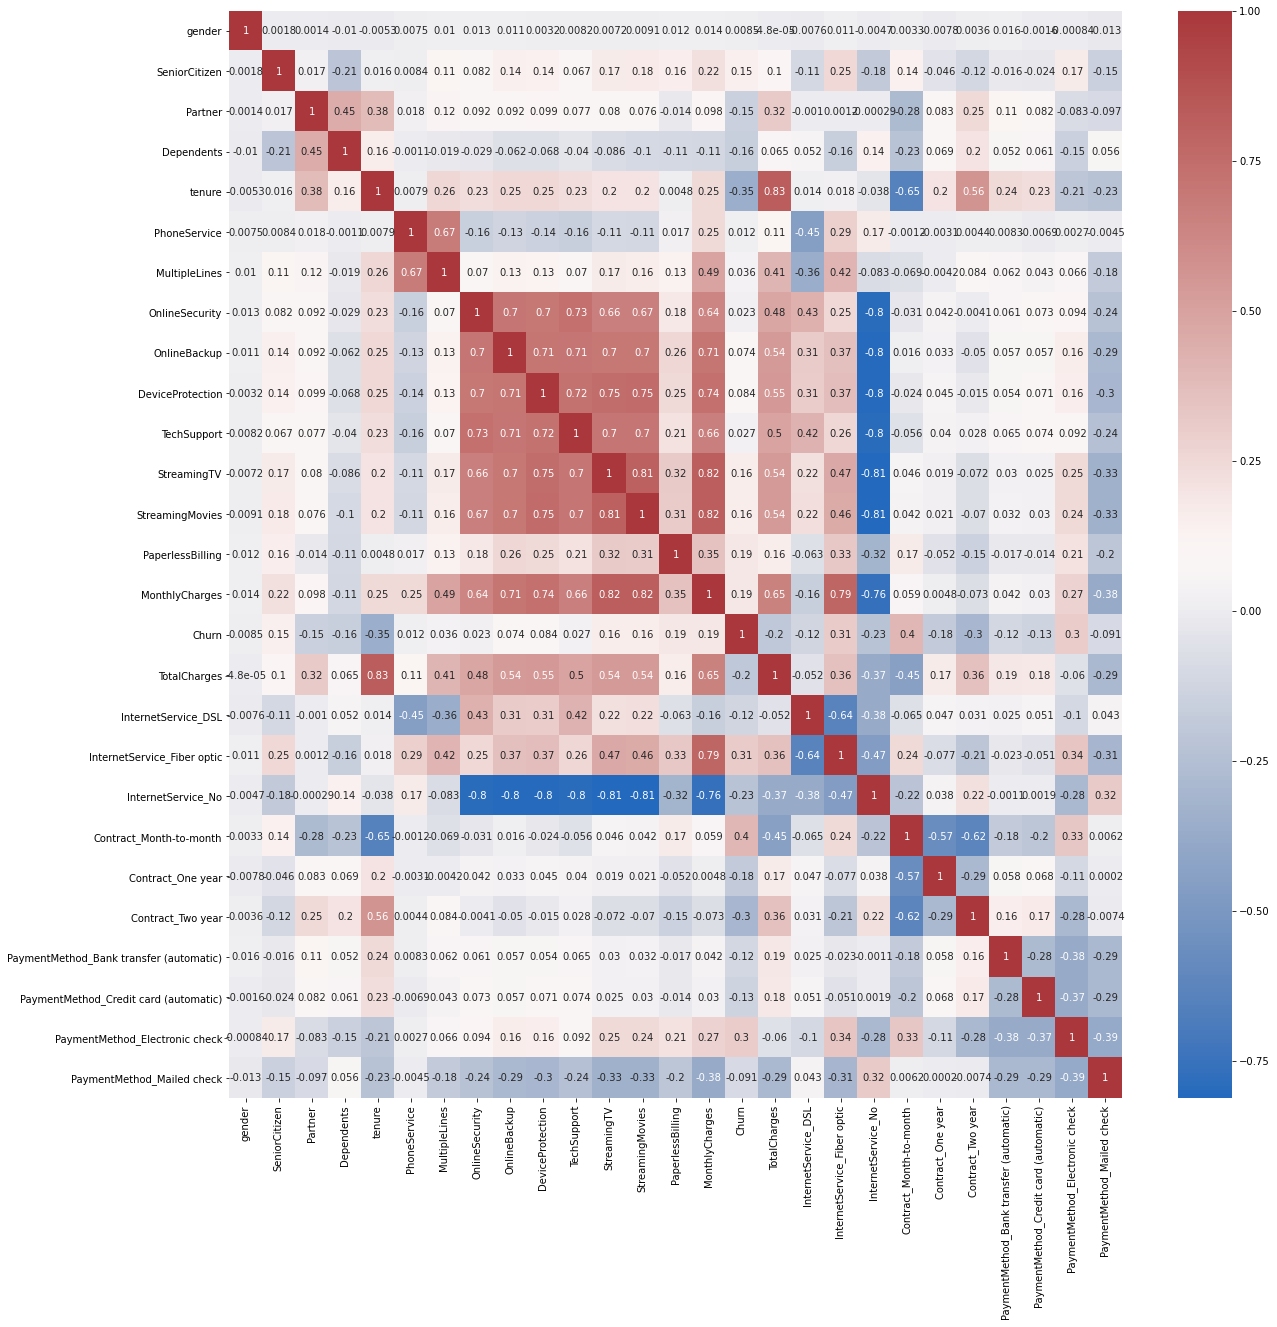

In [34]:
data_corr = data1.corr()

# displaying heatmap
%matplotlib inline
plt.figure(figsize=(20, 20))
dataplot = sns.heatmap(data_corr,
                       cmap="vlag",
                       annot=True)

plt.show()

In [35]:
n_true = len(data1.loc[data1['Churn'] == True])
n_false = len(data1.loc[data1['Churn'] == False])
print("Number of Churn: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of Non-Churn: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of Churn: 1869 (26.58%)
Number of Non-Churn: 5163 (73.42%)


### Model training, testing and tuning: 

In [36]:
X = data1.drop("Churn" , axis=1)
X = X.drop("customerID", axis=1)
y = data1.pop("Churn")

#### Build Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

Split set percentage of train and test dataset

In [38]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(data.index)) * 100))

69.88% data is in training set
29.96% data is in test set


#### Scoring our Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

The accuracy of the train set and the test set

In [40]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.9979683055668428
0.7246445497630332


#### Visualizing the Decision Tree

In [41]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

In [42]:
from os import system
from IPython.display import Image

In [43]:
retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))

The accuracy of test set for the decision Tree model after reducing the depth of the tree

In [44]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.7878911011783828
0.7976303317535545


In [56]:
dTreeR1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state=1)
dTreeR1.fit(X_train, y_train)
print(dTreeR1.score(X_train, y_train))
print(dTreeR1.score(X_test, y_test))

0.8027224705404307
0.7919431279620853


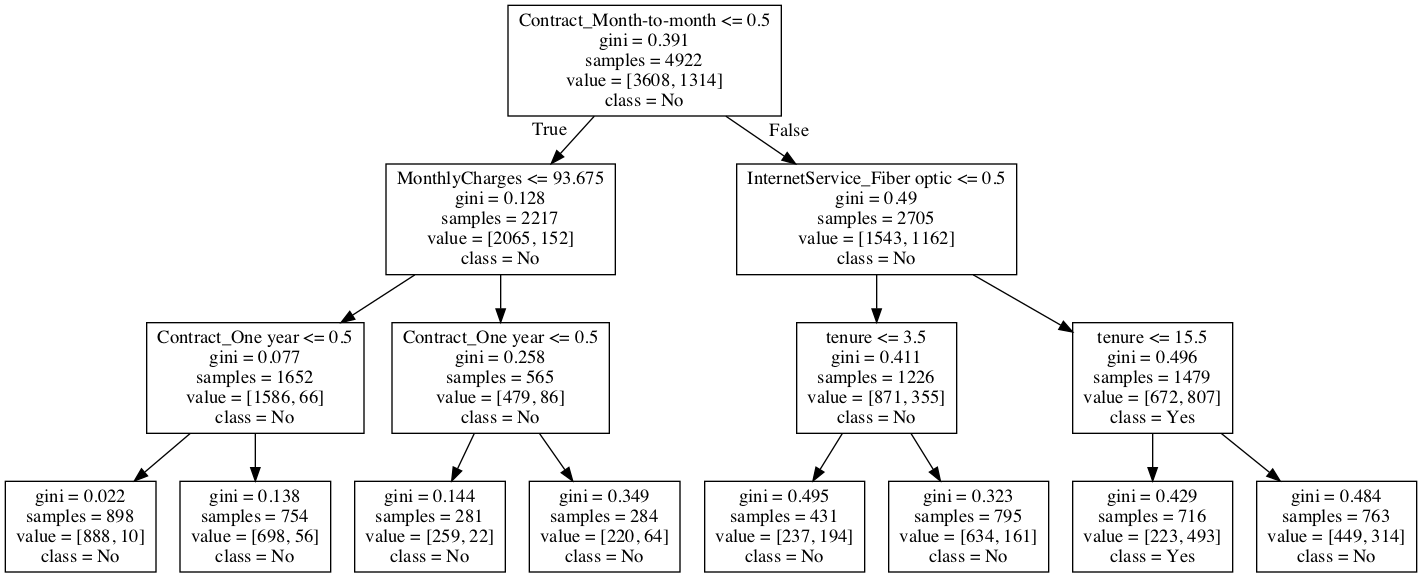

In [45]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_treeR.dot -o credit_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_treeR.png"))

#### Usage of the columns in the Decision Tree 

In [46]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                              Imp
gender                                   0.000000
SeniorCitizen                            0.000000
Partner                                  0.000000
Dependents                               0.000000
tenure                                   0.176119
PhoneService                             0.000000
MultipleLines                            0.000000
OnlineSecurity                           0.000000
OnlineBackup                             0.000000
DeviceProtection                         0.000000
TechSupport                              0.000000
StreamingTV                              0.000000
StreamingMovies                          0.000000
PaperlessBilling                         0.000000
MonthlyCharges                           0.020547
TotalCharges                             0.000000
InternetService_DSL                      0.000000
InternetService_Fiber optic              0.170231
InternetService_No                       0.000000


0.7976303317535545


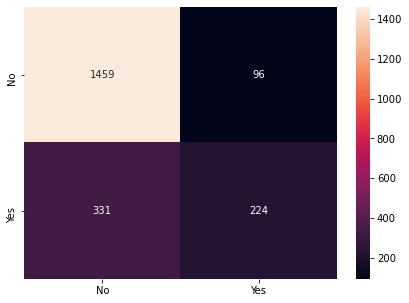

In [47]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]], columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

### Ensemble Learning - Bagging

In [48]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.7729857819905214


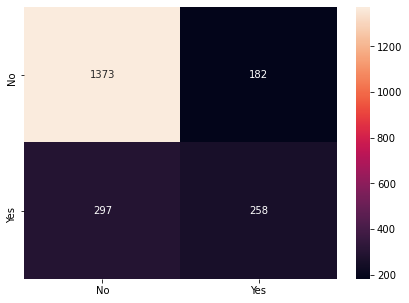

In [49]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]], columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

### Ensemble Learning - AdaBoosting

In [50]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, y_train)

0.7976303317535545


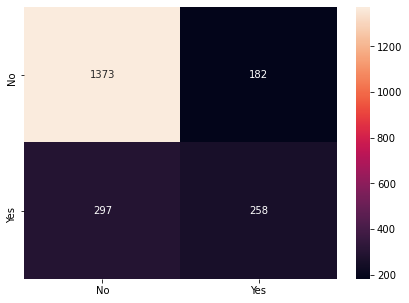

In [51]:
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]], columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

### Ensemble Learning - GradientBoost 

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.7995260663507109


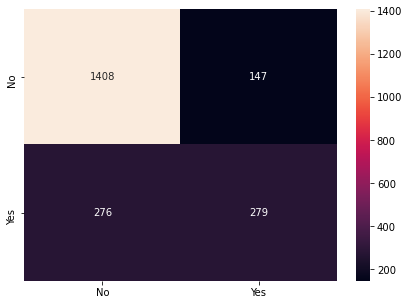

In [53]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]], columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

### Ensemble RandomForest Classifier 

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

0.7772511848341233


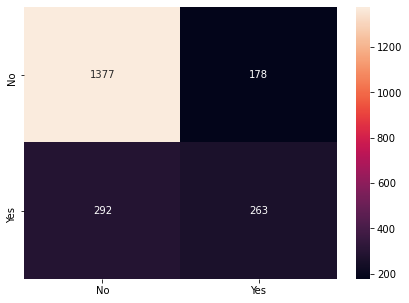

In [55]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]], columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

### Report

 Based on the above models the Gradient Boost gives the best accuracy compared to all the other models
 
    * When the depth of the tree was tried with 3 we got an accuracy of about 79.7% in the test dataset,
      but when the depth was increased to 5 we see that the accuracy was decreased to 79.1%
    * When we did bagging by replacing the samples of the models we got only 77% accuracy
    * And in Adaboost and Random Forest menthods as well the models seem to be a bit low compared to the Gradient           Boost model.

End